<a href="https://colab.research.google.com/github/cflores23/optimizacion/blob/main/Simulated_annealing_Ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np

In [2]:
#Implementación del método de ajuste Tweek

def modifcar_valor_var(w,u,l):
  new_w = w
  while new_w >= u or new_w <= l:
    n = random.uniform(-r,r)
    new_w = w+n
  return new_w


def Tweek(X,p,r,l_sup,l_inf):
  W = X
  U = l_sup
  L = l_inf
  len_x = len(X)
  n = 0

  for i in range(len_x):
    value = 1
    alea = random.uniform(0,1)
    if p >= alea:
      n = random.uniform(-r,r)
      if (U[i] <= W[i]+n) or (W[i]+n <= L[i]):
        x = modifcar_valor_var(W[i]+n,U[i],L[i])
        W[i] = x
      else:
        W[i] = W[i]+n
  return W

###Prueba del método Tweek

In [3]:
X = [0,0,0]
l_sup = [2,2,2]
l_inf = [0,0,0]
p = 0.7
r = 1.3
result = Tweek(X,p,r,l_sup,l_inf)
result

[0.7949343925236578, 0, 0.41061096680099785]

#Función objetivo

En este caso se prueba el algoritmo con la función de McCormick, obtenida de la página Test Functions for optimization. Por lo tanto esta implementación es para problemas continuos.

La función de McCormick es:
\begin{align}
        \mathbf{f(x)} &= sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 
    \end{align}
En seguida se implementa dicha ecuación:

In [4]:
import math
def McCormic(sol):
  sol = sol[:]
  #print(sol[0])
  term1 = math.sin(sol[0]+sol[1])
  term2 = (sol[0]-sol[1])**2
  term3 = -1.5*sol[0]
  term4 = 2.5*sol[1]
  #fDeX = math.sin(sol[0]+sol[1]) + (sol[0]+sol[1])**2 - (1.5*(sol[0])) + (2.5*(sol[1])) + 1
  fDeX = term1+term2+term3+term4 + 1
  return fDeX

#Implementación del algoritmo Recocido simulado

In [9]:
#Parámetros para el método Tweek
lim_upper = [8,6]
lim_inf = [-2,-6]
p = 0.8
r = 1.5

#Lista de variables de decisión
X_i = [0,0]
#Creamos una solución inicial aleatoria
for i in range(len(lim_upper)):
  var = random.uniform(lim_upper[i],lim_inf[i])
  X_i[i]=var
print("Solución inicial: ",str(X_i))

#Crear un array para almacenar los resultados parciales y graficarlos
results = []
#Inicia algoritmo Simulated annealing
X = X_i.copy()
Best = X_i.copy()              #La mejor solución es la inicial
metropoli_size = 150    #Tamaño de la metropoli
delta = 0
T = 100
alpha = 0.2
iterations = 100
fDeBest = McCormic(Best)
print("F de Best", str(fDeBest))
#Ciclo del algoritmo 
while iterations > 0:
  for j in range(metropoli_size-1):
    S = Tweek(X,p,r,lim_upper,lim_inf)
    #print(S)
    #print("Best ", Best)
    fDeU = McCormic(S)#Evalúa la función
    fDeBest = McCormic(Best)
    #print("F de U= ",str(fDeU))
    #print("F de Best", str(fDeBest))
    if fDeU < fDeBest:   #para problemas de minimización
      Best = S.copy()
      X = S.copy()
    else:
      delta = fDeU - fDeBest
      if math.exp(-delta/T) >= random.uniform(0,1):
        X = S.copy()
  T = alpha*T
  results.append(fDeBest)
  iterations = iterations-1
  #print("Ciclo ", str(ciclos))
print("F de Best = ",str(fDeBest))
print("Mejor solución encontrada: ",Best)
#print("Bests", results)

Solución inicial:  [4.554884517589237, -5.621587445427158]
F de Best 82.79867348907493
F de Best =  -1.9065425367025322
Mejor solución encontrada:  [-0.4804296571839579, -1.4924439508857692]


A continuación se grafican las soluciones obtenidas en cada iteración.

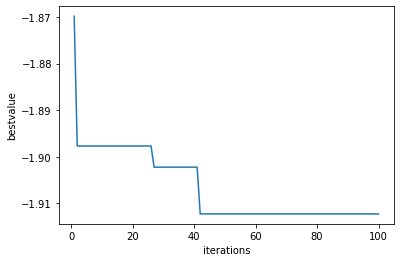

In [8]:
import matplotlib.pyplot as plt
iteraciones = np.zeros(100)
for i in range(100):
  iteraciones[i] = i+1
plt.plot(np.array(iteraciones),np.array(results))
plt.ylabel("bestvalue")
plt.xlabel("iterations")
plt.show()